In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
import calendar
import pickle

def get_days_in_month(year, month):
    return calendar.monthrange(year, month)[1]

# Initialize the webdriver
driver = webdriver.Chrome()

# Function to extract table data
def extract_table_data():
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    table = soup.find('table', id='wt-his')
    data = []
    for row in table.find_all('tr')[1:]:  # Skip header row
        th = row.find('th')
        if th:
            time = th.text.strip()
            cols = row.find_all('td')
            if cols:
                row_data = [time] + [col.text.strip() for col in cols]
                data.append(row_data)
    return data

# Initialize an empty dictionary to store all data
all_data = {}

location = '@11789022'
years = ["2020", "2021", "2022"]
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
days = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]
for year in years:
    for month in range(0,len(months)):
        driver = webdriver.Chrome()
        driver.get(f"https://www.timeanddate.com/weather/{location}/historic?month={month+1}&year={year}")
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "wt-his")))
        for day in range(0, get_days_in_month(int(year), int(months[month]))):
            date = f"{year}{months[month]}{days[day]}"
            # Update the dropdown value and trigger change event
            driver.execute_script(f"""
                const dropdown = document.getElementById('wt-his-select');
                dropdown.value = '{date}';
                dropdown.dispatchEvent(new Event('change'));
            """)
    
            # Wait for the table to update
            time.sleep(1) # change the sleep time depending on the speed of your computer
            
            # Extract data for the current day
            day_data = extract_table_data()
            all_data[date] = day_data
        driver.quit()
        print(f"Scraped data for {year} {months[month]}")


# Print the collected data
temperature_data = {}
for day in all_data:
    hours = {}
    for row in all_data[day]:
        hours[f"{row[0][:(row[0].find('m'))]}m"] = row[2] 

    temperature_data[day] = hours


with open('temperature_data.pkl', 'wb') as file:
    pickle.dump(temperature_data, file)


Scraped data for 2020 01
Scraped data for 2020 02
Scraped data for 2020 03
Scraped data for 2020 04
Scraped data for 2020 05
Scraped data for 2020 06
Scraped data for 2020 07
Scraped data for 2020 08
Scraped data for 2020 09
Scraped data for 2020 10
Scraped data for 2020 11
Scraped data for 2020 12
Scraped data for 2021 01
Scraped data for 2021 02
Scraped data for 2021 03
Scraped data for 2021 04
Scraped data for 2021 05
Scraped data for 2021 06
Scraped data for 2021 07
Scraped data for 2021 08
Scraped data for 2021 09
Scraped data for 2021 10


ReadTimeoutError: HTTPConnectionPool(host='localhost', port=63746): Read timed out. (read timeout=120)

In [2]:
import pickle

with open('temperature_data.pkl', 'rb') as file:
    my_variable = pickle.load(file)

temperature_data = my_variable

In [4]:
import json

# Convert the dictionary to JSON
json_data = json.dumps(temperature_data)

# Write the JSON data to a file
with open('temperature_data.json', 'w') as file:
    file.write(json_data)

print("Temperature data exported to temperature_data.json")

Temperature data exported to temperature_data.json


In [6]:
import csv

# ...

# After scraping all the data

# Create a CSV file
with open('temperature_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Date', 'Time', 'Temperature'])  # Write header row

    for day in temperature_data:
        for time in temperature_data[day]:
            writer.writerow([f"{day[:4]}-{day[4:6]}-{day[6:]}",time, f"{temperature_data[day][time][:-3]}"])
          # Write each data row

print("Temperature data exported to temperature_data.csv")

Temperature data exported to temperature_data.csv


In [2]:
day = temperature_data["20220505"]
for time in day:
    print(f"{time}: {day[time]}")

12:53 am: 45 °F
1:53 am: 40 °F
2:53 am: 41 °F
3:53 am: 39 °F
4:53 am: 36 °F
5:53 am: 37 °F
6:53 am: 38 °F
7:53 am: 45 °F
8:53 am: 50 °F
9:53 am: 55 °F
10:53 am: 59 °F
11:53 am: 61 °F
12:53 pm: 64 °F
1:53 pm: 66 °F
2:53 pm: 68 °F
3:53 pm: 67 °F
4:53 pm: 70 °F
5:53 pm: 68 °F
7:00 pm: 58 °F
7:53 pm: 64 °F
8:53 pm: 60 °F
9:53 pm: 60 °F
10:53 pm: 59 °F
11:53 pm: 55 °F


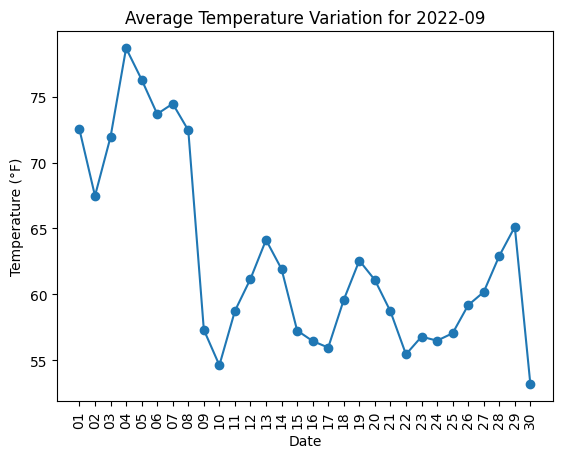

In [3]:
import matplotlib.pyplot as plt
import calendar

def get_days_in_month(year, month):
    return calendar.monthrange(year, month)[1]

date = "202209"
days = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]
temperatures = []
days_in_month = get_days_in_month(int(date[:4]), int(date[4:]))

for day in days[:days_in_month]:
    temps = temperature_data[date+day]
    temperature = 0
    for time in temps:
        temperature += float(temps[time].replace('\xa0°F', ''))
    temperatures.append(temperature/len(temps))

plt.plot(days[:days_in_month], temperatures, marker='o')

plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title(f'Average Temperature Variation for {date[:4]}-{date[4:]}')
plt.xticks(rotation=90)

plt.show()

ValueError: x and y must have same first dimension, but have shapes (30,) and (0,)

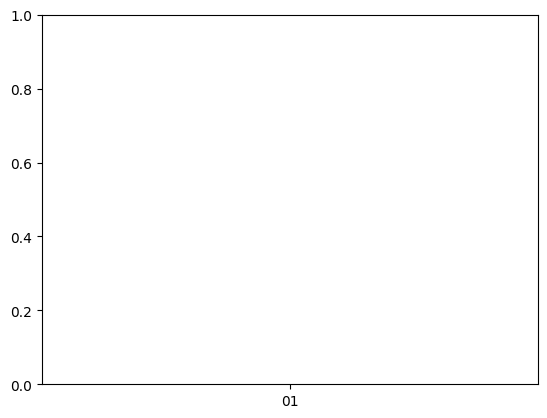

In [7]:
import matplotlib.pyplot as plt

date = "20220901"

temperatures = []

temps = temperature_data[date]

plt.plot(days[:days_in_month], temperatures, marker='o')

plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title(f'Average Temperature Variation for {date[:4]}-{date[4:6]-date[6:]}')
plt.xticks(rotation=90)

plt.show()

In [2]:
import csv
import json
from collections import defaultdict

def csv_to_json(csv_file):
    """
    Converts a CSV file with 'date', 'time', and 'temp' columns into a JSON file
    where each day is a separate object.

    Args:
        csv_file (str): Path to the CSV file.
    """

    data = defaultdict(list)
    with open(csv_file, 'r') as f:
        reader = csv.reader(f)
        next(reader)  # Skip the header row
        for row in reader:
            date, time, temp = row
            data[date].append({'time': time, 'temp': temp})

    json_data = []
    for date, readings in data.items():
        json_data.append({'date': date, 'readings': readings})

    with open('output.json', 'w') as f:
        json.dump(json_data, f, indent=4)

# Replace 'your_csv_file.csv' with the actual path to your CSV file
csv_to_json('temperature_data.csv')

